# Examples of Paired Transforms in `PyTorch 0.3`

Showcasing the effect of applying paired transforms on (image, ground-truth) pairs.

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload 
%autoreload 2

import paired_transforms_pt03 as p_tr

In [2]:
# load image and labels with PIL
image = Image.open('images/22_training.png') # PIL image in [0,255], 3 channels
gdt = Image.open('images/22_training_av.png') # PIL image in {0,255}, 3 channels

In [3]:
def imshow_pair(im, gdt):
    f, ax = plt.subplots(1, 2, figsize=(12,6))
    ax[0].imshow(np.asarray(im)),  ax[0].axis('off')
    ax[1].imshow(np.asarray(gdt)), ax[1].axis('off')
    plt.tight_layout()

In [4]:
def imshow_pair_list(im_l, gdt_l):
    n_pairs = len(im_l)
    f, ax = plt.subplots(2, n_pairs, figsize=(n_pairs*n_pairs, 2*n_pairs))
    for i in range(n_pairs):
        ax[0, i].imshow(np.asarray(im_l[i])),  ax[0,i].axis('off') 
        ax[1, i].imshow(np.asarray(gdt_l[i])), ax[1,i].axis('off') 
    plt.tight_layout()

## `Resize()`

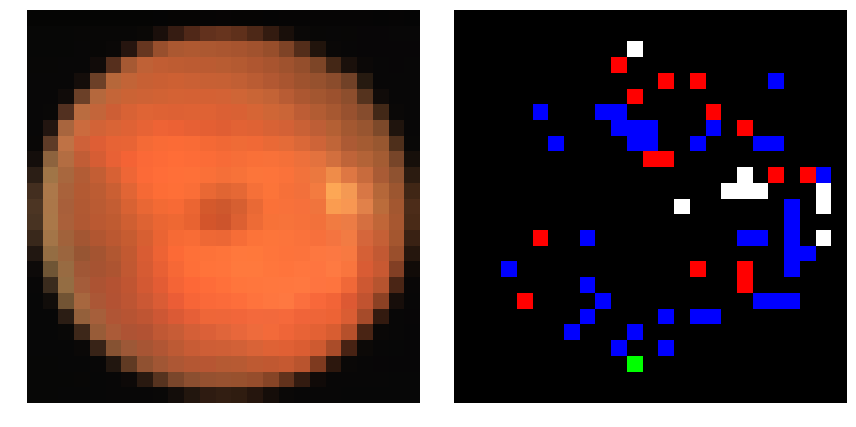

In [5]:
resize_paired = p_tr.Resize(25)
resized_pair = resize_paired(image, gdt)
imshow_pair(*resized_pair)

Note that we implement nearest neighbor interpolation in the groundtruth and bicubic in the image.

## `CenterCrop()`

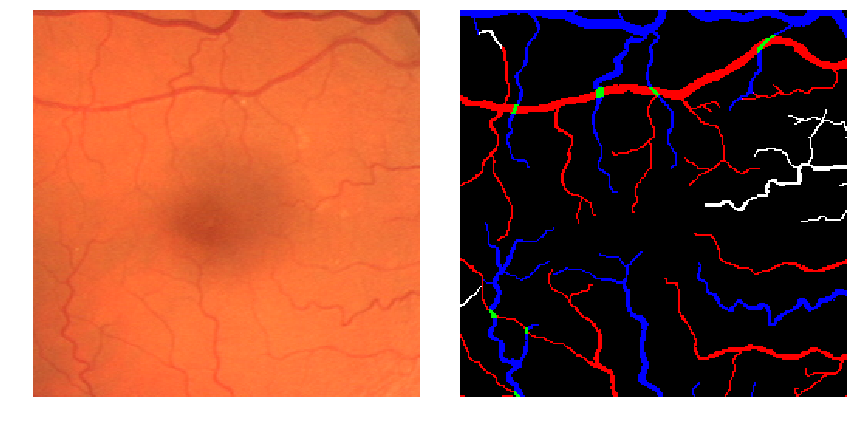

In [6]:
center_crop_paired = p_tr.CenterCrop(250)
center_cropped_pair = center_crop_paired(image, gdt)
imshow_pair(*center_cropped_pair)

## `RandomCrop()`

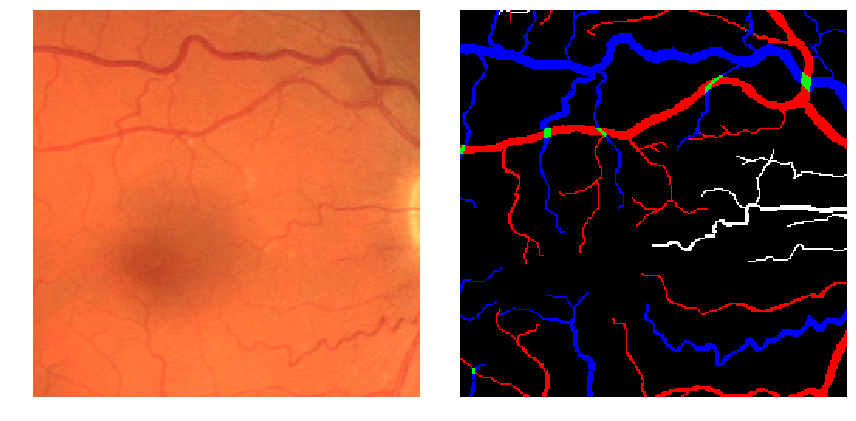

In [7]:
random_crop_paired = p_tr.RandomCrop(250)
random_cropped_pair = random_crop_paired(image, gdt)
imshow_pair(*random_cropped_pair)

## `RandomHorizontalFlip()`

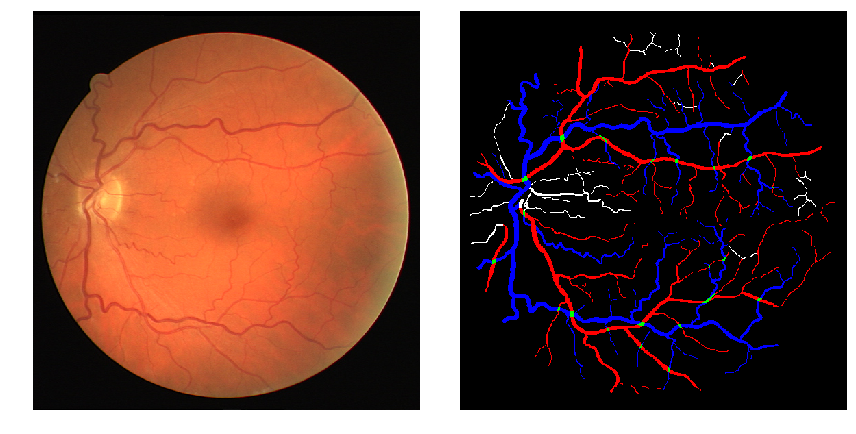

In [8]:
random_hor_flip_paired = p_tr.RandomHorizontalFlip()
random_flipped_pair = random_hor_flip_paired(image, gdt)
imshow_pair(*random_flipped_pair)

## `RandomVerticalFlip()`

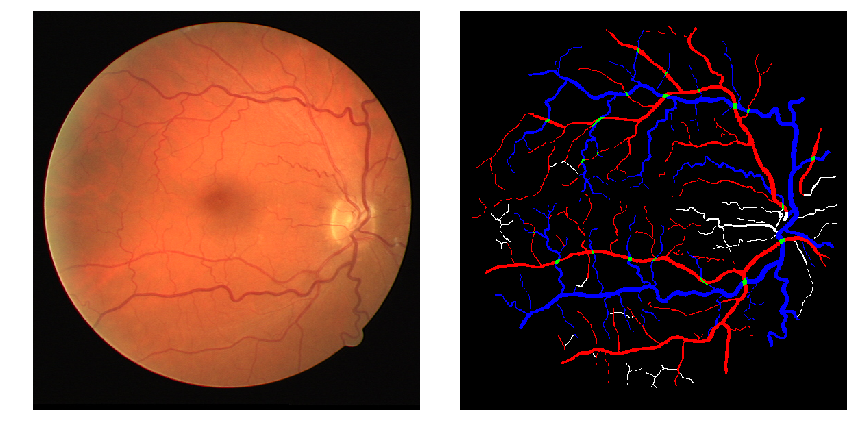

In [9]:
random_ver_flip_paired = p_tr.RandomVerticalFlip()
random_flipped_pair = random_ver_flip_paired(image, gdt)
imshow_pair(*random_flipped_pair)

## `RandomResizedCrop()`

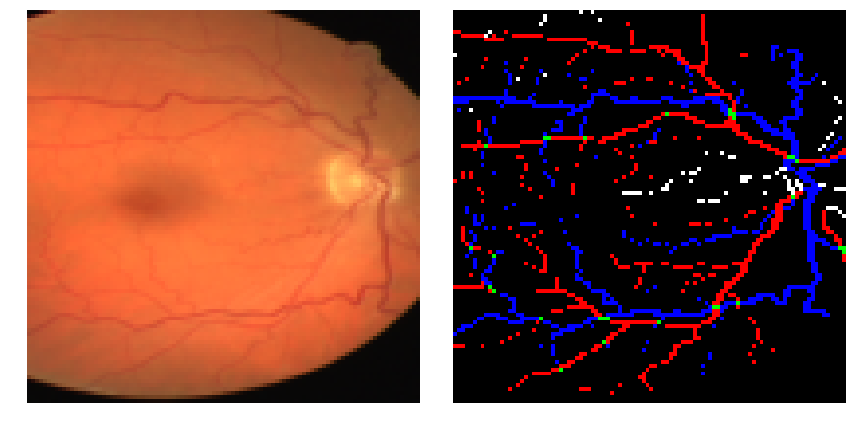

In [10]:
random_res_crop_paired = p_tr.RandomResizedCrop(100, (0.5, 0.6), (2./3., 3./4.))
random_resized_cropped_pair = random_res_crop_paired(image, gdt)
imshow_pair(*random_resized_cropped_pair)

## `FiveCrop()`

In [11]:
size = 250
five_cropper = p_tr.FiveCrop(size)
im_l, gt_l = five_cropper(image, gdt)

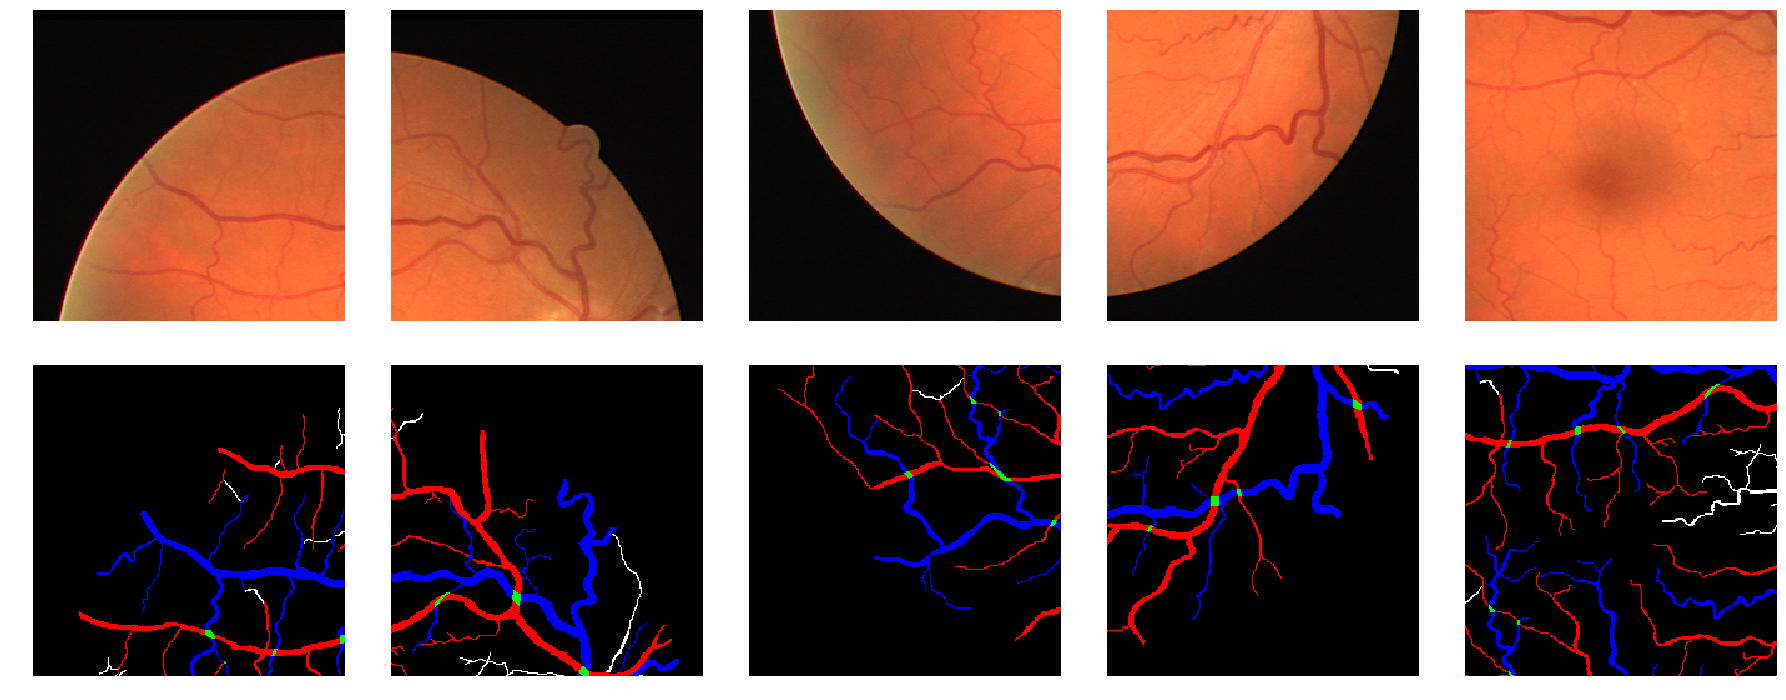

In [12]:
imshow_pair_list(im_l, gt_l)

## `TenCrop()`

In [13]:
size = 250
ten_cropper = p_tr.TenCrop(size)
im_l, gt_l = ten_cropper(image, gdt)

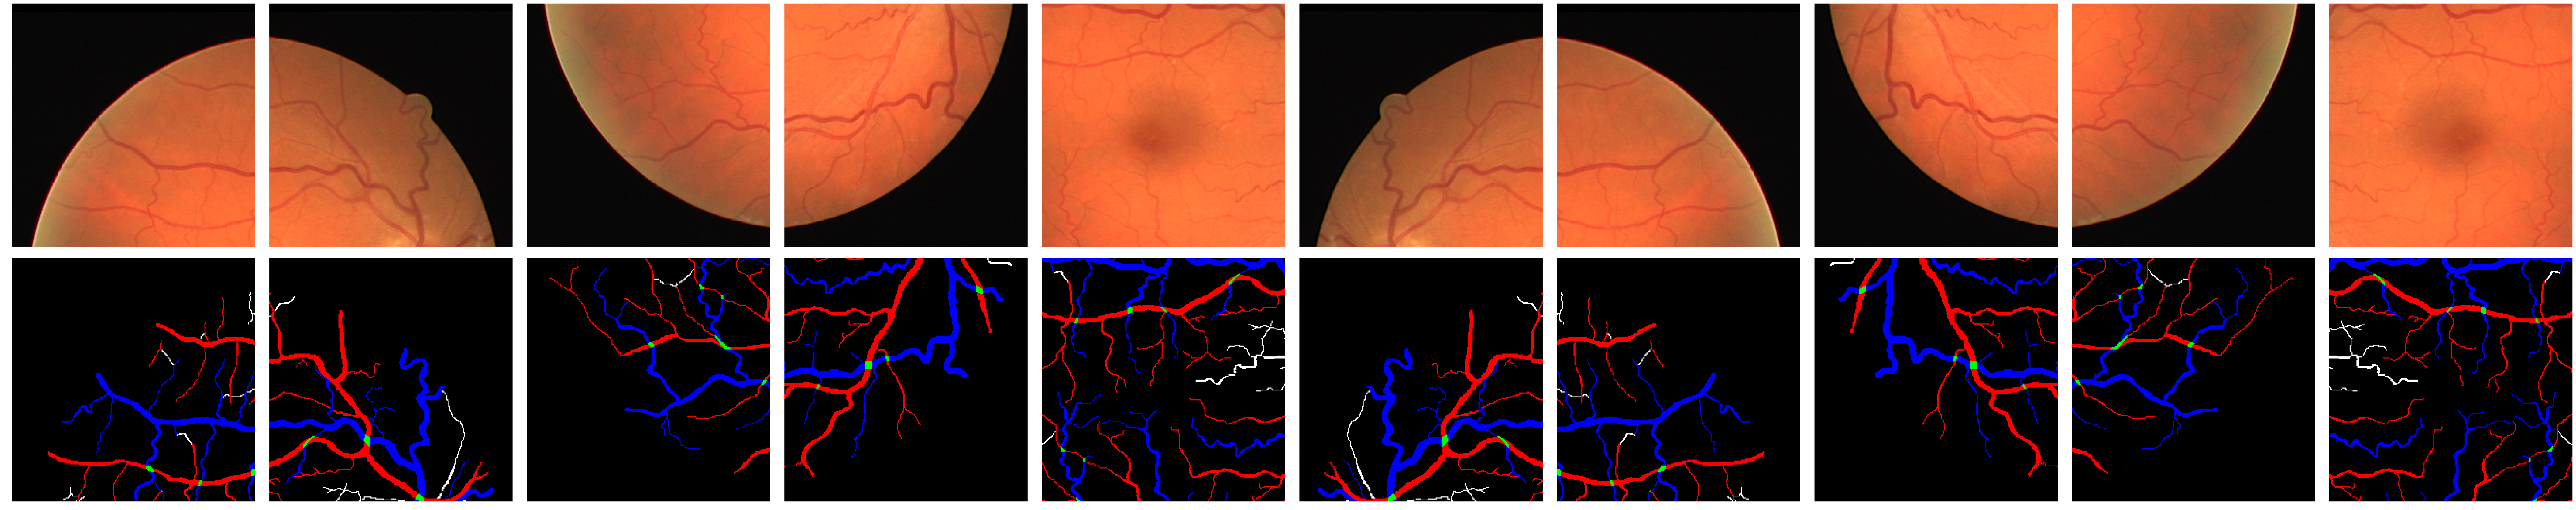

In [14]:
imshow_pair_list(im_l, gt_l)

## `RandomRotation()`

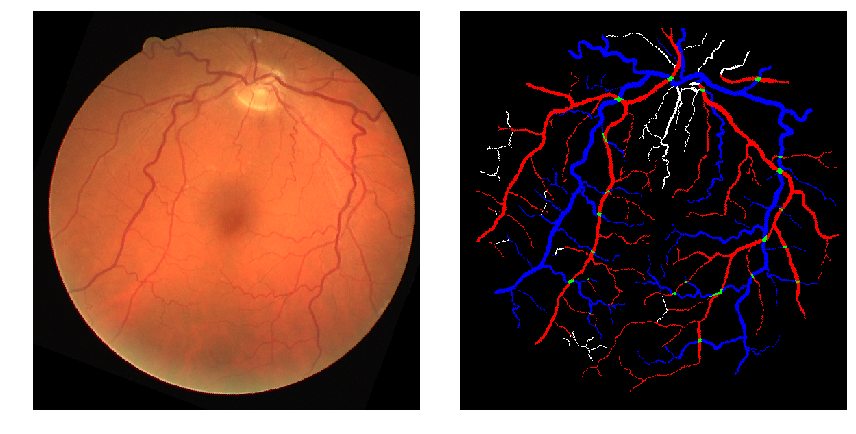

In [15]:
degrees=(0,180)
rotate_paired = p_tr.RandomRotation(degrees)
rotated_pair = rotate_paired(image, gdt)
imshow_pair(*rotated_pair)

# `Compose`:

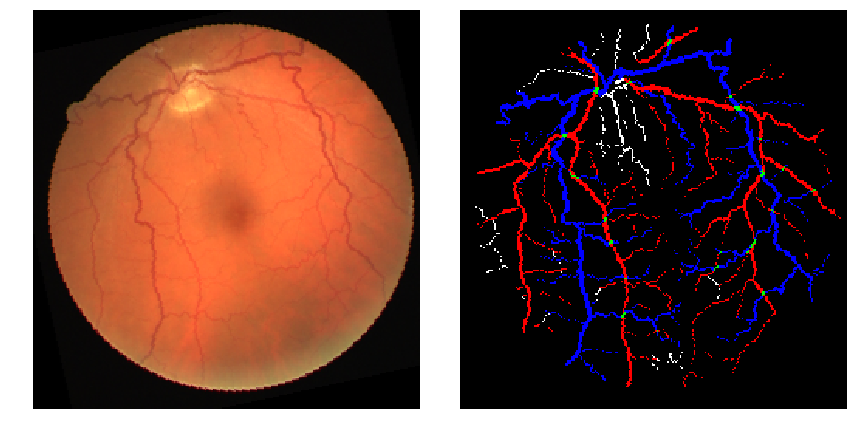

In [16]:
degrees=(90,180)
composed_paired_tr = p_tr.Compose([p_tr.Resize(250), p_tr.RandomRotation(degrees)])
image_tr, gdt_tr = composed_paired_tr(image, gdt)
imshow_pair(image_tr, gdt_tr)

# `ToTensor`:

In [17]:
tt = p_tr.ToTensor()
img_tnsr, gdt_tnsr = tt(image, gdt)
type(img_tnsr), type(gdt_tnsr)

(torch.FloatTensor, torch.FloatTensor)

# `ToPILImage`:

In [18]:
tp = p_tr.ToPILImage()
img_2, gdt_2 = tp(img_tnsr, gdt_tnsr)
type(img_2), type(gdt_2)

(PIL.Image.Image, PIL.Image.Image)

# Non-pairable transforms:
The transforms below are not intended to be applied to the ground-truth image, and hence will raise an exception if you attempt to pass a pair (image, ground-truth). However, they will still be succesfully applied if the input is a single image.

## `LinearTransformation()`

In [ ]:
import torch

In [ ]:
from torchvision.transforms import LinearTransformation as lt
from torchvision.transforms import ToTensor
tt = ToTensor()

Note: This below is not the way to use LinearTransformation, it's just for illustrative purposes

In [ ]:
tr_mt = torch.randn(3*20*20, 3*20*20)
lin_tr = lt(tr_mt)
transformed = lin_tr(tt(image.resize((20,20))))

In [ ]:
tr_mt = torch.randn(3*20*20, 3*20*20)

In [ ]:
# this raises a NotImplementedError
lin_tr_paired = p_tr.LinearTransformation(tr_mt)
transformed_pair = lin_tr_paired(tt(image.resize((20,20))), tt(gdt.resize((20,20))))

## `ColorJitter()`

In [ ]:
brightness, contrast, saturation, hue = 0.25, 0.25, 0.25, 0.25
# this raises a NotImplementedError
jitter_paired = p_tr.ColorJitter(brightness, contrast, saturation, hue)
jittered_pair = jitter_paired(image, gdt)

## `Grayscale()`

In [ ]:
n_channels = 1
# this raises a NotImplementedError
grayscale_paired = p_tr.Grayscale(n_channels)
grayscale_pair = grayscale_paired(image, gdt)

## `RandomGrayscale()`

In [ ]:
gray_prob = 0.5
# this raises a NotImplementedError
rand_grayscale_paired = p_tr.RandomGrayscale(gray_prob)
rand_grayscale_pair = grayscale_paired(image, gdt)

# Unmodified classes:

`Normalize`, `Pad`, and `Lambda` are not implemented differently than standard `PyTorch` transforms.